In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
style.use('classic')
%matplotlib inline

In [2]:
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
print('Shape of train dataset {}'.format(df_train.shape))
print('Shape of test dataser {}'.format(df_test.shape))

Shape of train dataset (550068, 12)
Shape of test dataser (233599, 11)


In [6]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

Since **"NaN"** values in only in the column of **"Product_Category_2"** and **"Product_Category_3"** therefore the product only belongs to **"Product_Category_1"** so replacing the NaN value with the **"0"**

In [3]:
df_train.fillna(0 , inplace =True)
df_test.fillna(0 , inplace = True)
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [9]:
df_train.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,6.215492,6.250712,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,14.000000,8.000000,12054.000000


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## Exploratory Data Analysis

First let see the "Purchase" column

- Distribution 
- How is it affected by other columns
- Normalization of the column

In [38]:
print('Skewness in the Purchase Distribution {}'.format(df_train['Purchase'].skew()))
print('Kurtosis in the purchase Distribution {}'.format(df_train['Purchase'].kurt()))

Skewness in the Purchase Distribution 0.6001400037087128
Kurtosis in the purchase Distribution -0.3383775655851702


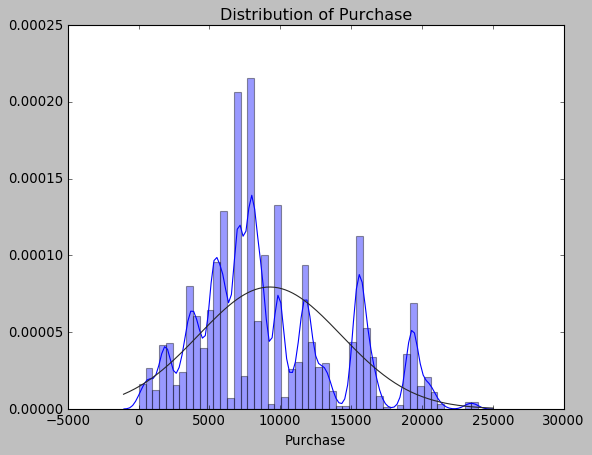

In [27]:
# Distribution of the columns
style.use('classic')
sns.distplot(df_train['Purchase'] , fit = norm)
plt.title('Distribution of Purchase')
plt.show()

Let's find out how is the Purchase column affected by the Numerical column

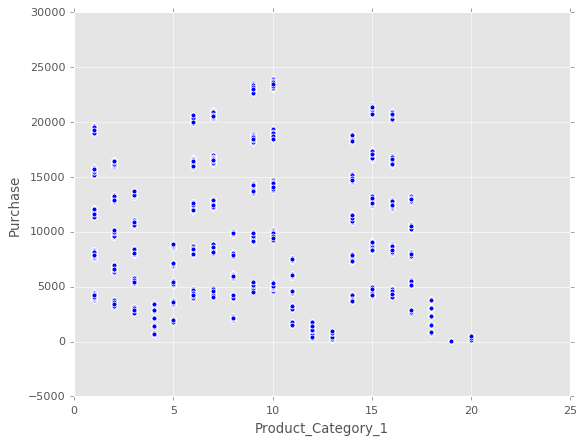

In [33]:
style.use('ggplot')
sns.scatterplot(x = 'Product_Category_1', y = 'Purchase'  ,data = df_train)
plt.show()

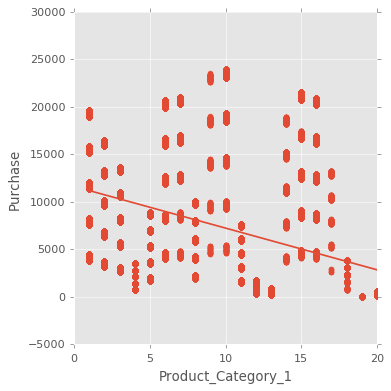

In [34]:
sns.lmplot(x='Product_Category_1' , y='Purchase', data = df_train)
plt.show()

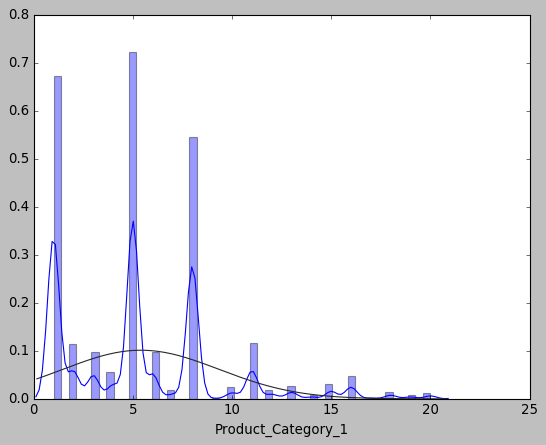

In [36]:
# Distribution of column Product_Category_1
style.use('classic')
sns.distplot(df_train['Product_Category_1'] ,  fit = norm)
plt.show()

Product_Category_2

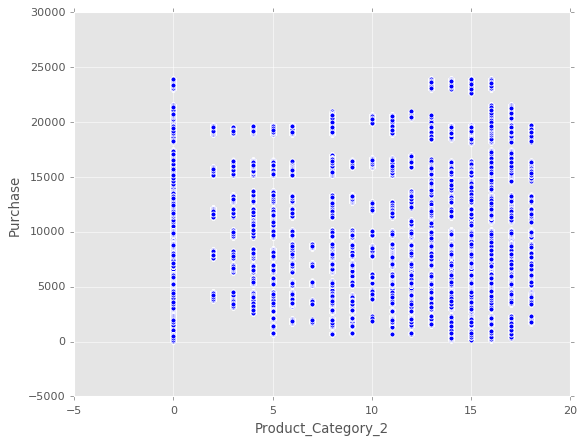

In [39]:
style.use('ggplot')
sns.scatterplot(x= 'Product_Category_2', y='Purchase' , data=df_train)
plt.show()

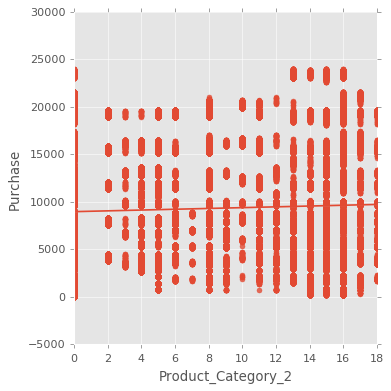

In [40]:
sns.lmplot(x = 'Product_Category_2' , y = 'Purchase' ,  data=df_train)
plt.show()

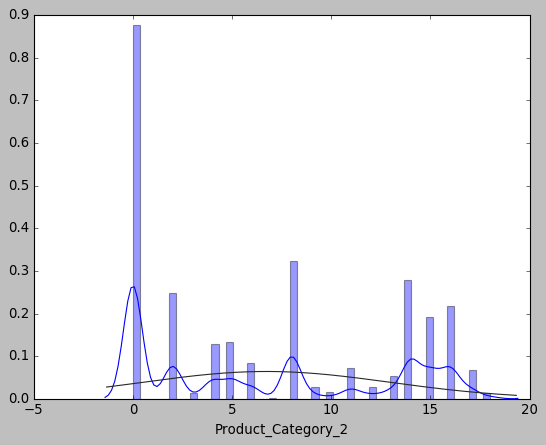

In [41]:
# Distribution of the Product_Category_2
style.use('classic')
sns.distplot(df_train['Product_Category_2'] , fit = norm)
plt.show()

Product_Category_3

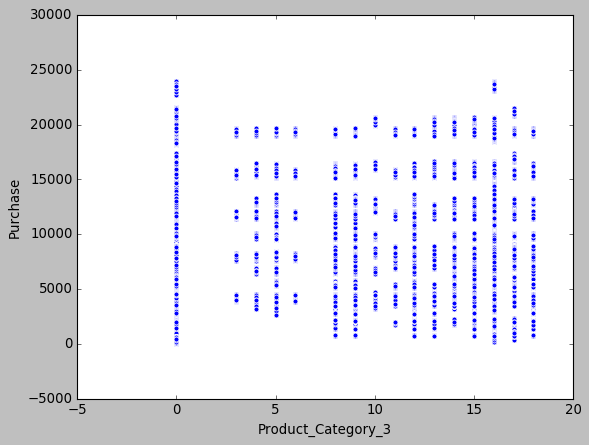

In [42]:
sns.scatterplot(x= 'Product_Category_3' , y='Purchase', data=df_train)
plt.show()

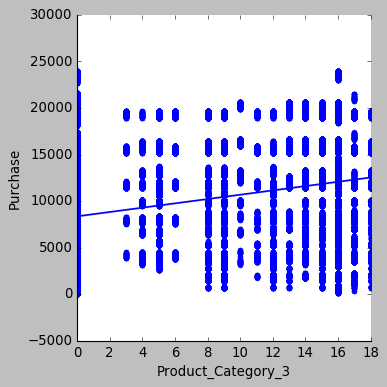

In [43]:
sns.lmplot(x='Product_Category_3' , y='Purchase' , data = df_train)
plt.show()

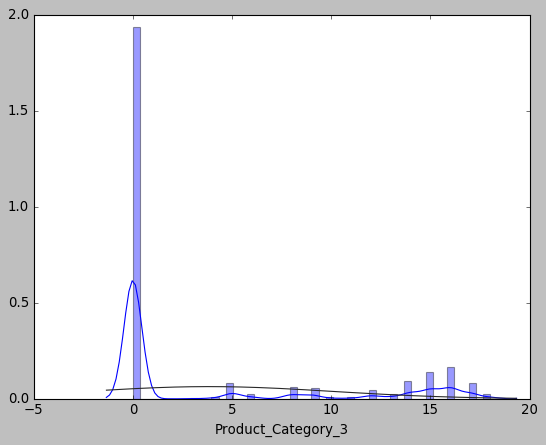

In [45]:
sns.distplot(df_train['Product_Category_3'] , fit = norm)
plt.show()

let's add all 3 categories and see the how its affect the Purchase column

In [4]:
df_train['Categories'] = df_train['Product_Category_1'] +df_train['Product_Category_2'] + df_train['Product_Category_3']

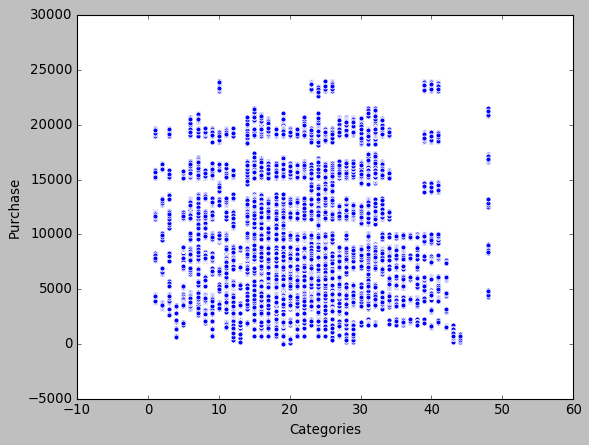

In [47]:
sns.scatterplot(x = 'Categories', y = 'Purchase' ,  data= df_train)
plt.show()

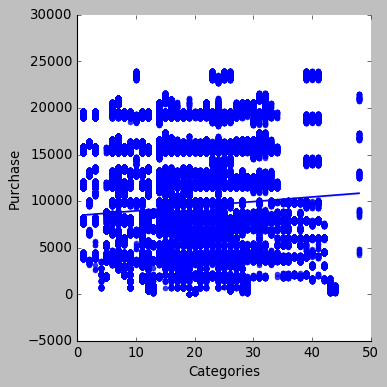

In [48]:
sns.lmplot(x = 'Categories' , y= 'Purchase' , data=df_train)
plt.show()

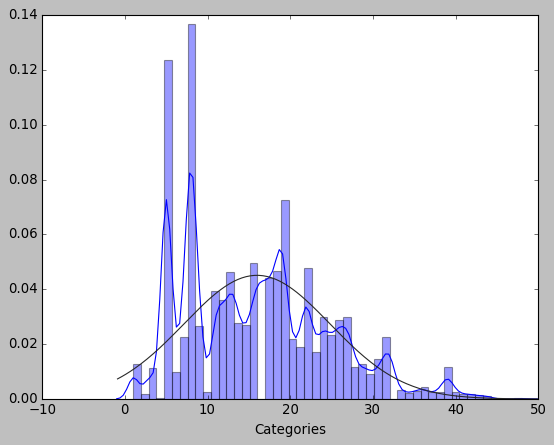

In [49]:
# Distribution of the Categories column
sns.distplot(df_train['Categories'] ,  fit = norm)
plt.show()

let's normalise the purchase column and the categories column and see the how it's affect the normalise purchase column

In [5]:
df_train['Norm_Purchase'] = np.log(df_train['Purchase'])
df_train['Norm_Categories'] = np.log(df_train['Categories'])

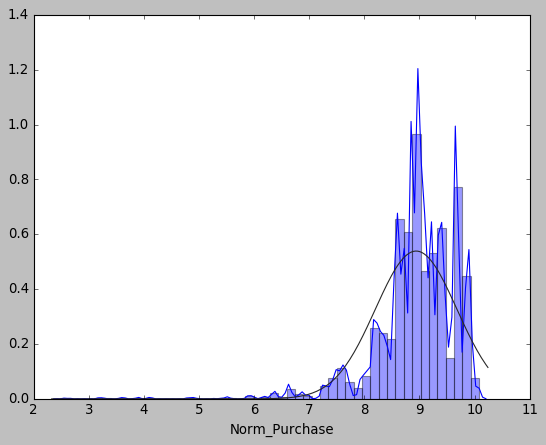

In [51]:
# Distribtion of the normalised column
sns.distplot(df_train['Norm_Purchase'] ,  fit=norm)
plt.show()

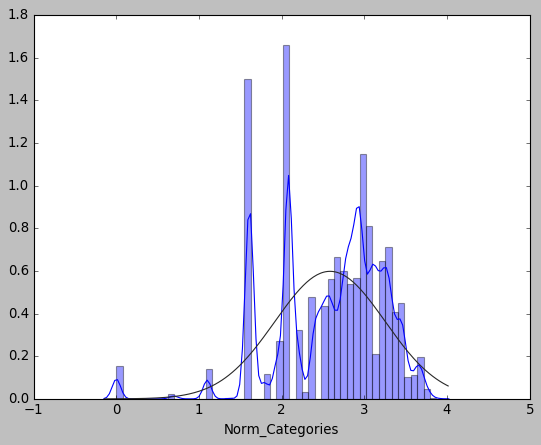

In [52]:
sns.distplot(df_train['Norm_Categories'] , fit = norm)
plt.show()

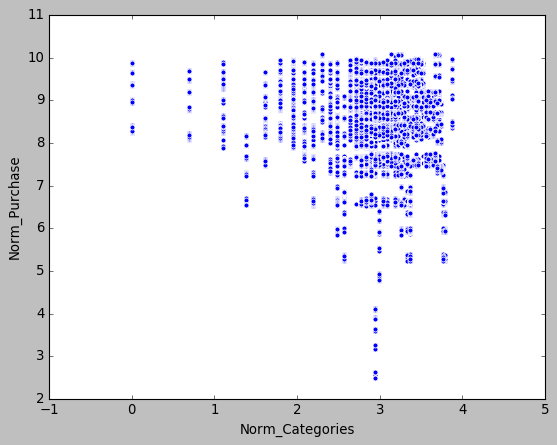

In [53]:
sns.scatterplot(x= 'Norm_Categories' , y = 'Norm_Purchase' ,  data=df_train)
plt.show()

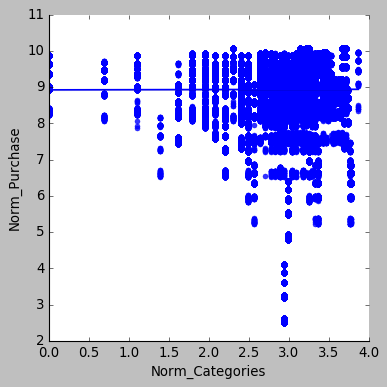

In [54]:
sns.lmplot(x= 'Norm_Categories' ,  y= 'Norm_Purchase' ,  data=df_train)
plt.show()

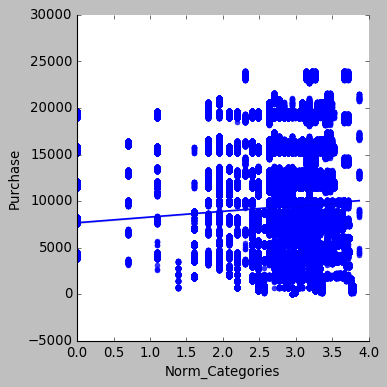

In [55]:
sns.lmplot(x= 'Norm_Categories' , y='Purchase' , data = df_train)
plt.show()

Let's see how is the categorical columns affect the Purchase column

In [8]:
print("Number of User in the dataset {}".format(df_train['User_ID'].nunique()))
print('Number of product in the dataset {}'.format(df_train['Product_ID'].nunique()))

Number of User in the dataset 5891
Number of product in the dataset 3631


There is 5891 unique user id and 3631 unique product in the dataset.. let's find out how a user bought how many items and also how many consumer of one unique product and how much it affects the "Purchase" column

In [14]:
df_train['How_Many_Product'] = df_train.groupby('User_ID')['Product_ID'].transform('count')
df_train['How_Many_Customer'] = df_train.groupby('Product_ID')['User_ID'].transform('count')

In [15]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Categories,Norm_Purchase,Norm_Categories,How_Many_Product,How_Many_Customer
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,3.0,9.032409,1.098612,35,227
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,21.0,9.629051,3.044522,35,581
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,12.0,7.259820,2.484907,35,102
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,26.0,6.963190,3.258097,35,341
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,8.0,8.983314,2.079442,77,203


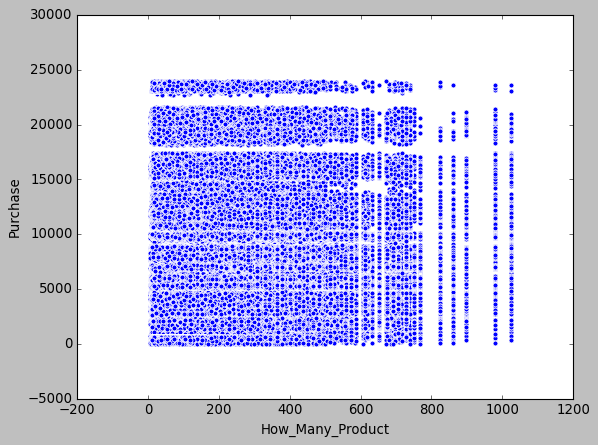

In [18]:
style.use('classic')
sns.scatterplot(x= 'How_Many_Product' , y= 'Purchase' ,  data= df_train)
plt.show()

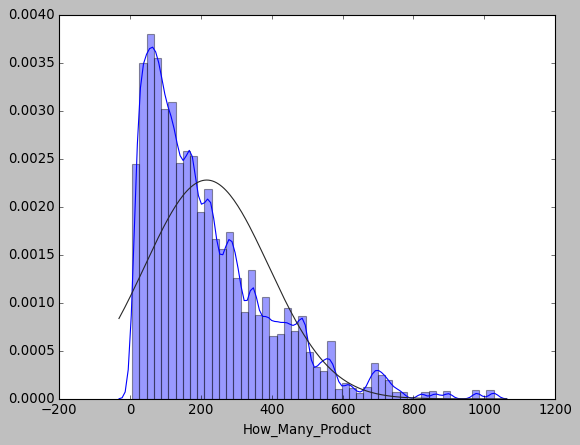

In [20]:
# Distribution of the "How_Many_Product"
sns.distplot(df_train['How_Many_Product'] , fit =norm)
plt.show()

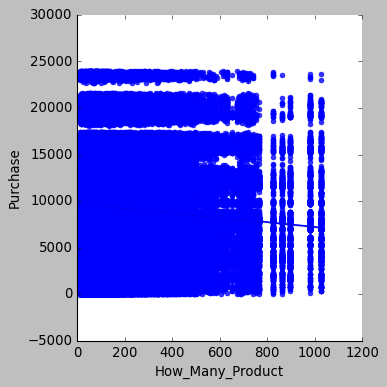

In [21]:
sns.lmplot(x = 'How_Many_Product' ,  y='Purchase' , data = df_train)
plt.show()

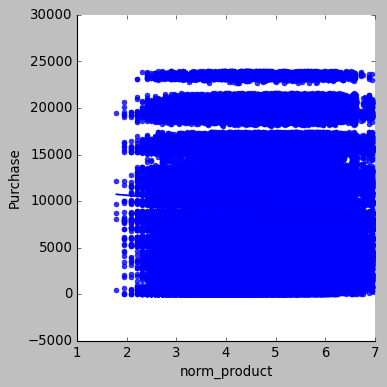

In [25]:
# let see the relation between Purchase and normalised How_Many_Product
df_train['norm_product'] = np.log(df_train['How_Many_Product'])
sns.lmplot(x = 'norm_product' , y='Purchase' ,  data = df_train)

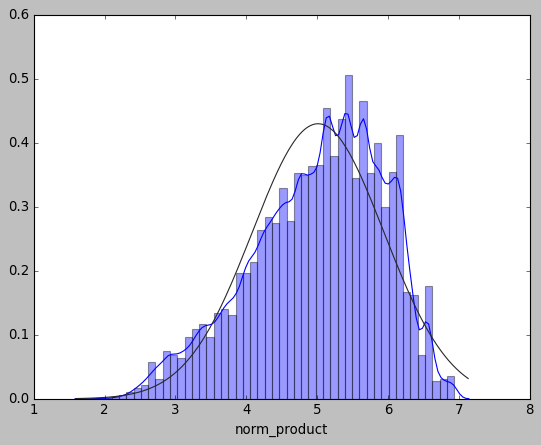

In [26]:
sns.distplot(df_train['norm_product'],fit=norm)
plt.show()

As we can see when customers buy more product they pay less amount of money

Now let's see how "Number of customer for a product" affect the Purchase column

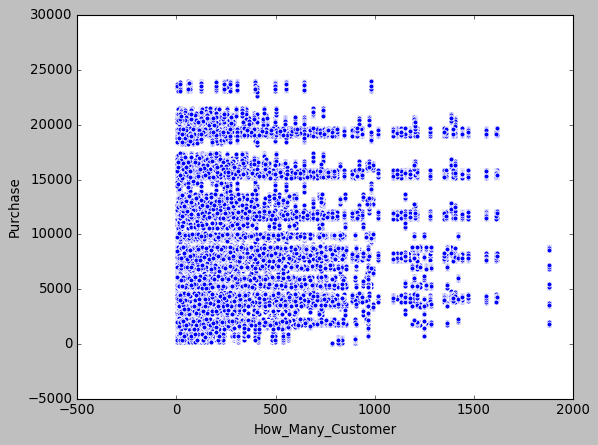

In [27]:
sns.scatterplot(x = 'How_Many_Customer' ,  y ='Purchase' ,  data = df_train)
plt.show()

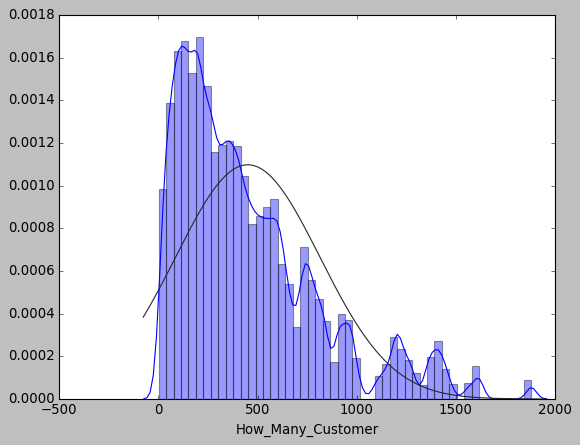

In [28]:
sns.distplot(df_train['How_Many_Customer'] ,  fit=norm)
plt.show()

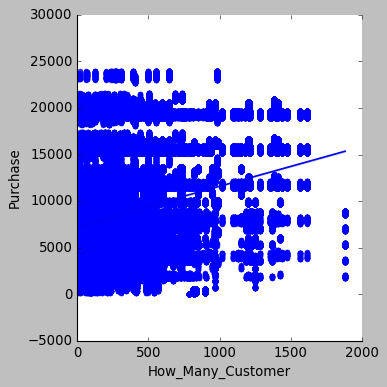

In [29]:
sns.lmplot(x = 'How_Many_Customer' , y = 'Purchase' ,  data=df_train)
plt.show()

As we can see from the above figure that the product which has less customer has less price and the product that has more demand have more price

Now let's find out which age group have what occupation and how it affect the Purchase column

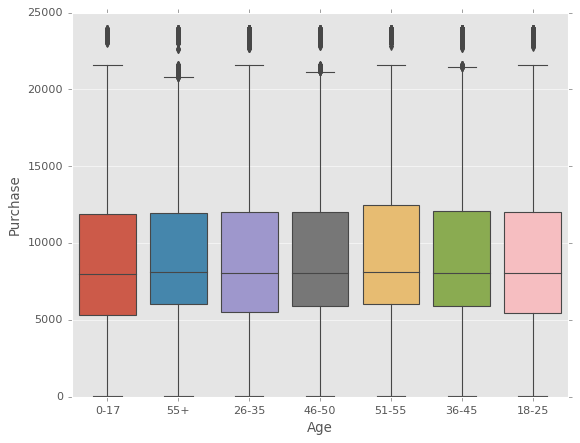

In [44]:
style.use('ggplot')
sns.boxplot(x = 'Age' , y = 'Purchase' , data = df_train)
plt.show()

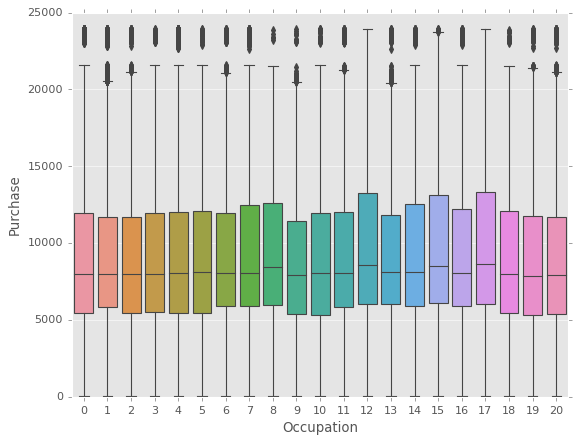

In [45]:
sns.boxplot(x = 'Occupation' , y = 'Purchase' , data = df_train)
plt.show()

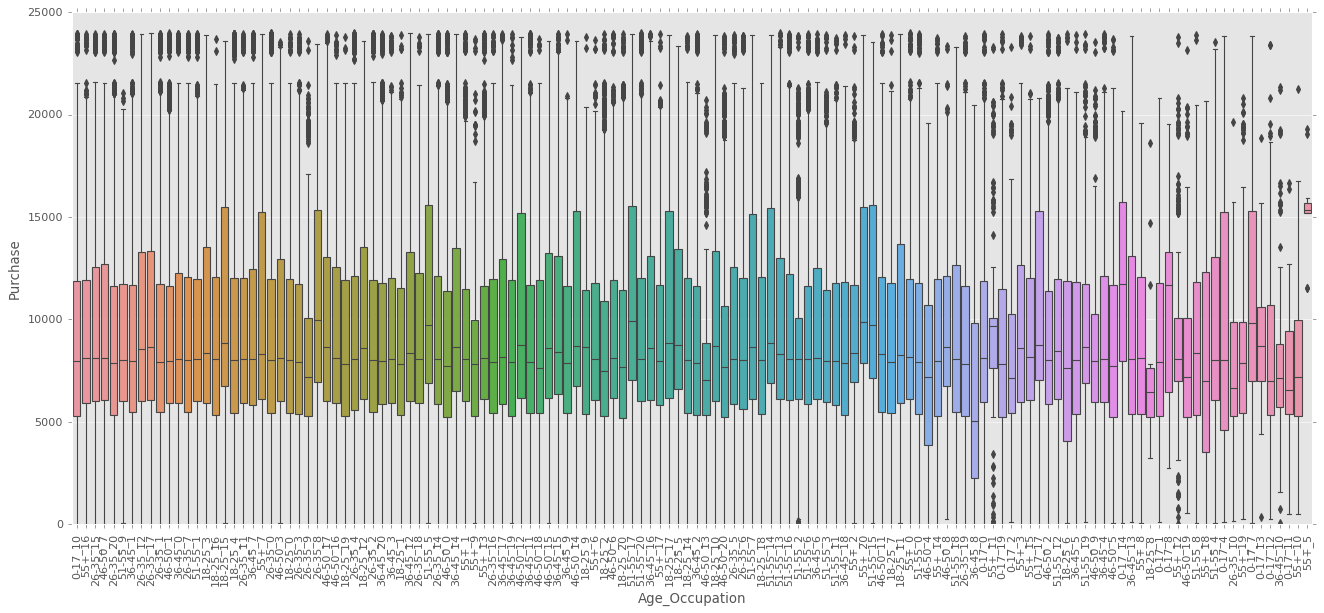

In [50]:
# let's add the two column and find out how it's affect the purchase column
plt.figure(figsize=(20,8))
df_train['Age_Occupation'] = df_train['Age']+'_'+df_train['Occupation'].astype('str')
sns.boxplot( x = 'Age_Occupation' , y = 'Purchase' ,  data = df_train)
plt.xticks(rotation = 90)
plt.show()

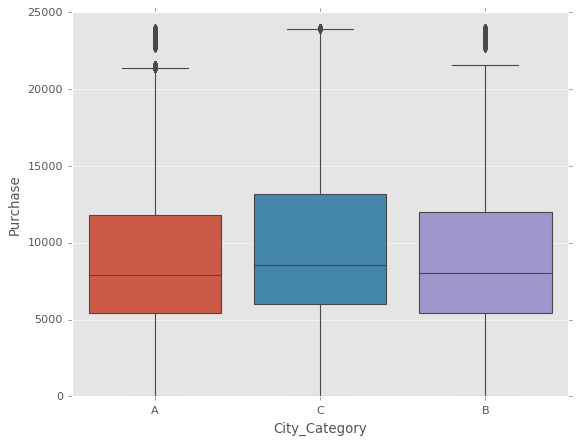

In [54]:
sns.boxplot(x='City_Category', y='Purchase' ,data=df_train)
plt.show()

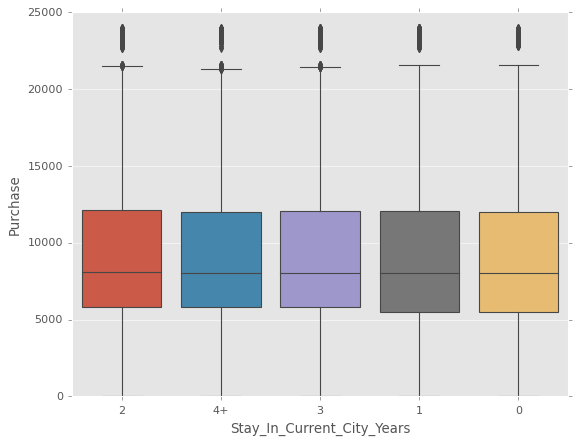

In [55]:
sns.boxplot(x='Stay_In_Current_City_Years', y='Purchase' ,data=df_train)
plt.show()

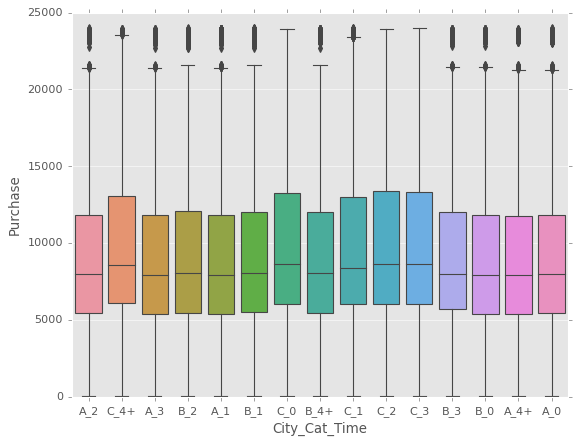

In [56]:
# let's these two column and see the ho it affect the Purchase column
df_train['City_Cat_Time'] = df_train['City_Category']+'_'+df_train['Stay_In_Current_City_Years']
sns.boxplot(x = 'City_Cat_Time' , y='Purchase' ,  data=df_train)
plt.show()

Let's see how many users are from different age group in the dataset

let's see the correlation table of the numerical values

In [71]:
corr = df_train.corr()

In [74]:
corr.style.background_gradient(axis = None)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Categories,Norm_Purchase,Norm_Categories,How_Many_Product,How_Many_Customer,norm_product,Age_count
User_ID,1.000000,-0.023971,0.020443,0.003825,0.003896,0.003605,0.004716,0.006986,0.001654,0.005680,-0.032458,0.003688,-0.015876,-0.025164
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.006712,0.012269,0.020833,0.009995,0.014251,0.007840,-0.002929,0.011679,-0.021318,-0.370440
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.001099,-0.004629,-0.000463,0.006350,-0.000860,0.005132,0.000678,-0.010415,-0.013805,-0.148580
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,-0.067877,-0.385534,-0.343703,0.124842,-0.435036,0.139019,0.017748,-0.205178,-0.005932,-0.031701
Product_Category_2,0.003896,0.006712,0.001099,-0.067877,1.000000,0.094750,0.052288,0.739309,0.049631,0.718080,-0.027482,0.098062,-0.019794,-0.009259
Product_Category_3,0.003605,0.012269,-0.004629,-0.385534,0.094750,1.000000,0.288501,0.601579,0.232863,0.510172,-0.050203,0.262332,-0.039122,0.002040
Purchase,0.004716,0.020833,-0.000463,-0.343703,0.052288,0.288501,1.000000,0.087651,0.858620,0.081264,-0.090356,0.308641,-0.084189,-0.007697
Categories,0.006986,0.009995,0.006350,0.124842,0.739309,0.601579,0.087651,1.000000,0.005838,0.926811,-0.046882,0.162956,-0.044188,-0.019169
Norm_Purchase,0.001654,0.014251,-0.000860,-0.435036,0.049631,0.232863,0.858620,0.005838,1.000000,0.003737,-0.053208,0.213168,-0.035619,-0.004822
Norm_Categories,0.005680,0.007840,0.005132,0.139019,0.718080,0.510172,0.081264,0.926811,0.003737,1.000000,-0.051529,0.173325,-0.049583,-0.018147
